# Project Summary
This project focuses on the application of predictive analytics to streamline the promotion process within a large multinational corporation (MNC) with multiple organizational verticals. Traditionally, identifying candidates for promotion has been manual and constrained by the time-consuming nature of HR evaluations and KPI-based assessments. By leveraging machine learning, this project aims to help the company predict which employees are most likely to be promoted to managerial positions and below, expediting their transition into new roles and enhancing HR efficiency.

TBC

# Business Understanding
Our client, a large MNC, operates across 9 broad organizational verticals. A primary challenge they face is identifying high-potential candidates for promotion in a timely manner. Currently, employees are recommended for promotion based on past performance and are required to complete training and evaluation programs specific to each vertical. Employees who achieve at least 60% KPI completion are considered for promotion, but final decisions are only made after all evaluations are completed, delaying the promotion cycle.

The goal is to help HR departments proactively identify employees eligible for promotion at a specific checkpoint, enabling a faster, data-driven promotion cycle.

# Problem Statement
The current promotion process for managerial positions and below is manual and time-intensive, leading to delays in transitioning employees into new roles. The HR department seeks a predictive model to assess the eligibility of employees for promotion based on demographic and performance data.

# Objectives

## Main Objective

The main objective of this project is to increase the effectiveness and precision of the promotion process for HR professionals, by developing a model that uses historical data to forecast which workers are most likely to be promoted.

## Key Business Questions
1. Which employees are most likely to be promoted in the next cycle?
2. What are the most significant factors influencing promotions within the organization?
3. Is there any observable bias in promotion decisions that needs to be addressed?
4. How can training programs be optimized to increase the likelihood of promotion?
5. What impact does promotion likelihood have on employee retention?

## Stakeholders
- **HR Department** - These are the primary users of the promotion prediction model.
- **Department Heads and Team Managers** - Managers would benefit from the insights to understand the promotion potential within their teams, support employee development, and make informed recommendations based on data.
- **Executive Leadership** - The findings of this study will inform strategic decisions on talent retention, workforce planning, and to align promotion processes with organizational goals.
- **Data Science/IT Team** - Responsible for managing the model deployment, updates, and integration with existing HR systems, ensuring data privacy and compliance throughout the project.


# Data Understanding

This section provides an overview of the datasets used in this project to predict employee promotions. 

The dataset consists of 54,808 observations of 14 variables.

We have two datasets:
- **Train Dataset**: Used for building the model. Contains information on current employees, their demographics, performance, and target labels indicating if they were promoted.
- **Test Dataset**: Used for model evaluation. Contains similar features but without the target labels.

The dataset provides comprehensive information about each employee's demographic profile, employment background, performance indicators, and training outcomes. Each record represents an employee and includes the following key features:

- **employee_id**: A unique identifier for each employee.
- **department**: The department to which the employee belongs, indicating their area of expertise.
- **region**: The geographical location of the employee’s role, represented as an unordered categorical variable.
- **education**: The highest level of education attained by the employee, which may influence role-specific skills and promotion potential.
- **gender**: The gender of the employee, providing insights into diversity in promotion patterns.
- **recruitment_channel**: The method by which the employee was recruited, indicating initial access channels.
- **no_of_trainings**: The number of training programs completed by the employee in the previous year, covering technical and soft skills.
- **age**: The employee’s age, which may correlate with experience and readiness for promotion.
- **previous_year_rating**: The performance rating assigned to the employee for the prior year.
- **length_of_service**: The number of years the employee has been with the organization, reflecting organizational experience.
- **KPIs_met >80%**: A binary indicator of whether the employee met over 80% of their Key Performance Indicators (KPIs) in the past year.
- **awards_won?**: A binary indicator showing if the employee received any awards in the previous year, which may highlight recognition of outstanding performance.
- **avg_training_score**: The average score achieved by the employee in recent training evaluations, which reflects skill development and training outcomes.
- **is_promoted**: The target variable indicating if the employee was recommended for promotion (1) or not (0).

Understanding these variables is crucial as they are the basis for training a model to predict promotion eligibility. By analyzing patterns in demographic and performance-related data, we aim to identify the factors most strongly associated with promotion, facilitating more objective and efficient promotion decisions.

# Data Exploration

#### Importing the libraries

In [1]:
#Importing the necessary classes, functions, and packages needed.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import Markdown, display


import warnings
warnings.filterwarnings('ignore')


**Loading the Dataset**

In [2]:
#Importing the provided train and test data

train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

print (f"train_data = {train.shape}")
print (f"test_data = {test.shape}")

train_data = (54808, 14)
test_data = (23490, 13)


**Understanding the data**

In [3]:
# Data Preview
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
# Checking Data Structure
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
# Checking the Summary Statistics
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


### Initial Observations and Data Quality
- **Missing Values**: The `previous_year_rating` and `education` features has some missing values.
- **Outliers**: The `length_of_service` has a few extreme values, possibly representing long-tenured employees.
- **Class Imbalance**: The target variable `is_promoted` may be imbalanced, which could impact model performance.

These observations guide our data cleaning and preprocessing steps.

# Data Cleaning

**Checking for Duplicates**

In [9]:
# Checking for duplicates based on the employee_id column
train.duplicated(['employee_id']).sum()

0

In [10]:
test.duplicated(['employee_id']).sum()

0

**Handling Missing Values**

In [11]:
# Checking for Null values
def missing_and_unique_values(train):
    summary = pd.DataFrame({
        'Missing Values': train.isnull().sum(),
        'Unique Values': train.nunique()
    })
    return summary

print("Train Dataset - Missing and Unique Values")
print(missing_and_unique_values(train))

print("\nTest Dataset - Missing and Unique Values")
print(missing_and_unique_values(test))

Train Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          54808
department                         0              9
region                             0             34
education                       2409              3
gender                             0              2
recruitment_channel                0              3
no_of_trainings                    0             10
age                                0             41
previous_year_rating            4124              5
length_of_service                  0             35
KPIs_met >80%                      0              2
awards_won?                        0              2
avg_training_score                 0             61
is_promoted                        0              2

Test Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          23490
department                      

In [12]:
# drop values that are null
train.dropna(axis=0,inplace=True)
test.dropna(axis=0, inplace=True)

In [13]:
# Confirm Null values dropped
def missing_and_unique_values(train):
    summary = pd.DataFrame({
        'Missing Values': train.isnull().sum(),
        'Unique Values': train.nunique()
    })
    return summary

print("Train Dataset - Missing and Unique Values")
print(missing_and_unique_values(train))

print("\nTest Dataset - Missing and Unique Values")
print(missing_and_unique_values(test))

Train Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          48660
department                         0              9
region                             0             34
education                          0              3
gender                             0              2
recruitment_channel                0              3
no_of_trainings                    0             10
age                                0             41
previous_year_rating               0              5
length_of_service                  0             35
KPIs_met >80%                      0              2
awards_won?                        0              2
avg_training_score                 0             61
is_promoted                        0              2

Test Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          20819
department                      

**Checking for Outliers**

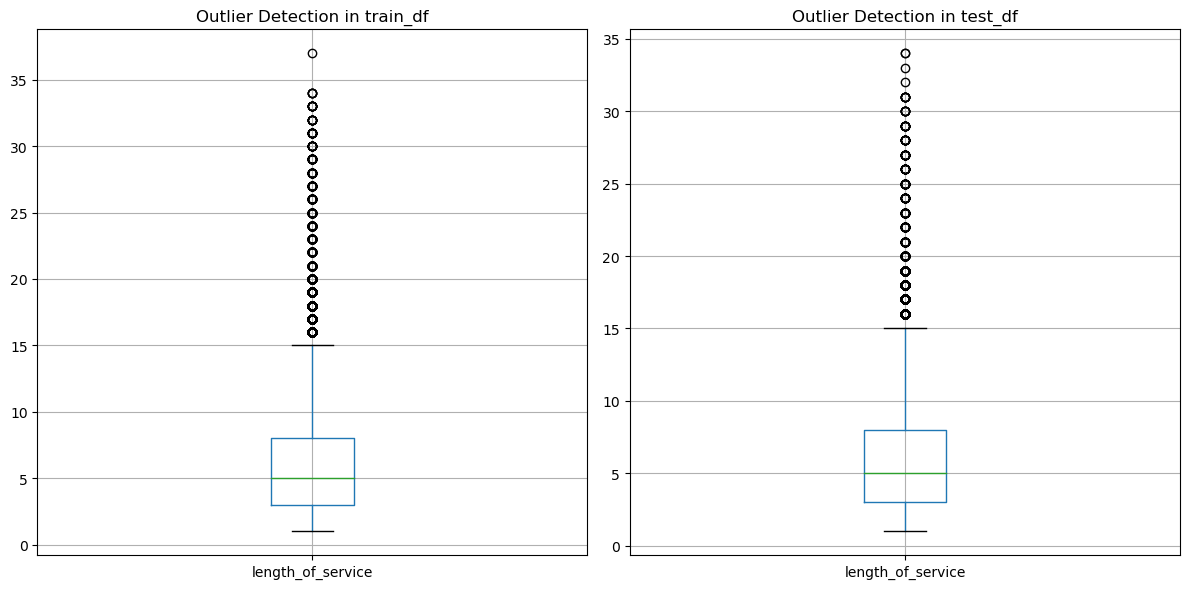

In [14]:
#Checking for Outliers
# Plot box plots to visualize outliers in the datasets
dataframes = [('train_df', train), ('test_df', test)]

# Plot side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for ax, (name, df) in zip(axes, dataframes):
    df[['length_of_service']].boxplot(ax=ax)
    ax.set_title(f'Outlier Detection in {name}')

plt.tight_layout()
plt.show()

**Checking for Class Imbalance**

Class Distribution (Percentage):
is_promoted
0    91.302918
1     8.697082
Name: proportion, dtype: float64


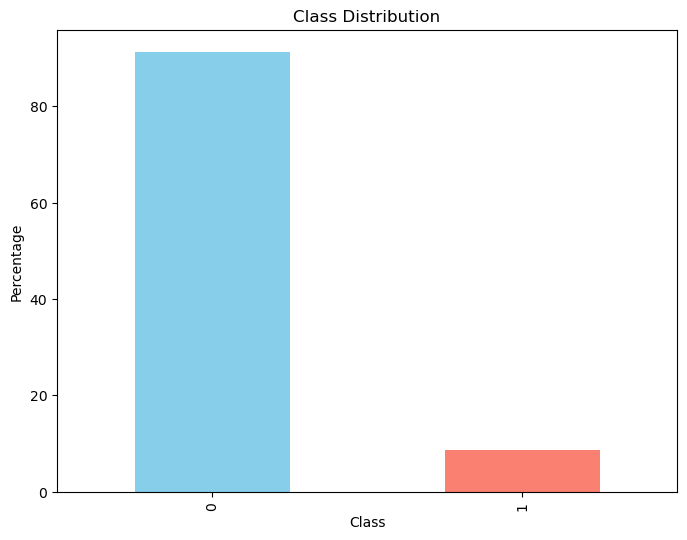

In [15]:
# Check class imbalance
def check_class_imbalance(df, target_column):
    # Calculate value counts
    value_counts = df[target_column].value_counts(normalize=True) * 100
    print("Class Distribution (Percentage):")
    print(value_counts)
    
    # Plot the class distribution
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.show()

# Check class imbalance in the train dataset
check_class_imbalance(train, 'is_promoted')

The class distribution shows a significant class imbalance, with 91.3% of instances labeled as "0" (not promoted) and only 8.7% labeled as "1" (promoted). This imbalance means the dataset has many more examples of employees who were not promoted compared to those who were.

# Data Pre-Processing

## Feature Engineering

**Region Column**

In [16]:
#Checking the count of unique values in the region column
train.region.value_counts()

region
region_2     10811
region_22     5435
region_7      4397
region_15     2512
region_13     2463
region_26     1966
region_31     1692
region_4      1626
region_27     1418
region_16     1319
region_11     1189
region_28     1143
region_23     1104
region_29      896
region_19      838
region_20      780
region_32      773
region_14      770
region_17      742
region_25      721
region_5       690
region_10      614
region_30      602
region_6       579
region_8       578
region_1       553
region_24      462
region_12      425
region_21      370
region_3       331
region_9       324
region_33      260
region_34      253
region_18       24
Name: count, dtype: int64

The region column could be simplified by grouping less common regions into an "Other" category, this will help reduce complexity and improve the models performance.

In [17]:
# Define threshold for grouping into "Other"
threshold = 1000

# Identify regions that meet the threshold criteria
common_regions = train['region'].value_counts()
common_regions = common_regions[common_regions >= threshold].index

# Use np.where to assign regions based on the threshold
train['region_cleaned'] = np.where(train['region'].isin(common_regions), train['region'], 'Other')

In [18]:
#Checking the number of unique values in the cleaned region column
train.region_cleaned.nunique()

14

**Age Column**

In [19]:
# Checking the count of unique values in the age column
train.age.value_counts()

age
32    3389
31    3268
30    3202
33    3106
34    2989
29    2731
35    2637
36    2451
28    2301
37    2117
27    2015
38    1875
39    1647
40    1616
26    1472
41    1254
42    1127
43     962
44     824
25     784
45     739
46     684
48     548
47     539
50     507
49     434
51     378
24     362
53     345
52     343
54     305
55     284
56     263
57     235
60     210
58     207
59     202
23     144
22      84
20      51
21      29
Name: count, dtype: int64

**Creating the age group feature**

The high number of unique values can make the model overly complex, resulting in the curse of dimensionality. To address this, we created a new feature called 'age_group' by binning the age values into the following categories:

Under 20 <br>
20-30 <br>
30-40 <br>
40-50 <br>
50-60 <br>
Over 60

In [20]:
train['age_group'] = pd.cut(train['age'], bins=[-1, 20, 30, 40, 50, 60, 70], 
                              labels=['Under 20', '20-30', '30-40', '40-50', '50-60', 'Over 60'])

**Length of Service column**

In [21]:
#Checking the count of unique values in the length of service column
train.length_of_service.value_counts()


length_of_service
3     6680
4     6585
2     6185
5     5622
7     5385
6     4582
8     2804
9     2555
10    2140
11     892
12     776
13     660
15     580
16     539
14     536
17     426
18     384
1      380
19     319
20     128
21      74
24      67
23      62
22      60
25      49
26      41
27      36
29      30
28      29
31      19
30      12
33       9
32       9
34       4
37       1
Name: count, dtype: int64

**Creating the service group feature**

To better capture the non-linear relationship between length of service and promotion potential, I created a new feature called 'service_group' by binning the length_of_service values into the following categories:

Less than 2 years<br>
2-5 years<br>
5-10 years<br>
Over 10 years<br>

In [22]:
train['service_group'] = pd.cut(train['length_of_service'], bins=[-0.1, 2, 5, 10, 20], 
                                  labels=['Less than 2 years', '2-5 years', '5-10 years', 'Over 10 years'])

**average_training_score column**

In [23]:
train.avg_training_score.describe()

count    48660.000000
mean        63.603309
std         13.273502
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [24]:
train.avg_training_score.value_counts()

avg_training_score
50    2303
49    2287
48    2081
60    1988
51    1980
      ... 
99      34
98      32
41      24
40       4
39       2
Name: count, Length: 61, dtype: int64

In [25]:
train['score_group'] = pd.cut(
    train['avg_training_score'], bins=[-0.1, 50, 60, 75, 100], labels=['Low', 'Medium', 'High', 'Very High'])

The binning of avg_training_score is based on the score distribution and quartile values, creating categories that are easy to interpret and meaningful. These bins—Low (≤50), Medium (51-60), High (61-75), and Very High (>75)—align with performance levels, helping to identify employees’ training outcomes as underperforming, average, above-average, or top performers. This approach improves interpretability, reduces model complexity, and maintains consistency across data points.

## Encoding categoring variables

In [26]:
# Encoding categorical columns
categorical_cols = train.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    train[col] = label_encoder.fit_transform(train[col])

## Splitting the data

In [27]:
# Split the predictor and target variables
X = train.drop('is_promoted', axis=1) #predictor
y = train['is_promoted'] #target 

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Balancing the Target Variable

In [30]:
!pip install -U imbalanced-learn

In [31]:
from imblearn.over_sampling import SMOTE

# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

is_promoted
0    44428
1     4232
Name: count, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

is_promoted
0    33350
1    33350
Name: count, dtype: int64


## Statistical Normality Test

In [36]:
from scipy.stats import normaltest

# Conduct normality test on each feature in the training dataset
normality_results = {}

for column in X_train.columns:
    stat, p_value = normaltest(X_train[column])
    normality_results[column] = {'statistic': stat, 'p_value': p_value}

# Display results
for feature, result in normality_results.items():
    print(f"Feature: {feature}, Statistic: {result['statistic']:.4f}, p-value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print(f"{feature} does not follow a normal distribution (p < 0.05)")
    else:
        print(f"{feature} follows a normal distribution (p >= 0.05)")
    print("\n" + "-"*50 + "\n")  # Add a separator line and extra space between features

Feature: employee_id, Statistic: 33070.1040, p-value: 0.0000
employee_id does not follow a normal distribution (p < 0.05)

--------------------------------------------------

Feature: department, Statistic: 3657.7160, p-value: 0.0000
department does not follow a normal distribution (p < 0.05)

--------------------------------------------------

Feature: region, Statistic: 4255.2645, p-value: 0.0000
region does not follow a normal distribution (p < 0.05)

--------------------------------------------------

Feature: education, Statistic: 155904.3417, p-value: 0.0000
education does not follow a normal distribution (p < 0.05)

--------------------------------------------------

Feature: gender, Statistic: 92645.2240, p-value: 0.0000
gender does not follow a normal distribution (p < 0.05)

--------------------------------------------------

Feature: recruitment_channel, Statistic: 132484.7401, p-value: 0.0000
recruitment_channel does not follow a normal distribution (p < 0.05)

------------

## Scaling the data

In [37]:
# Scaling features (necessary for models like Logistic Regression, SVM, etc.)

scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert into a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Clustering

In [42]:
#from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):  # Minimum of 2 clusters for silhouette score
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for each number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.show()

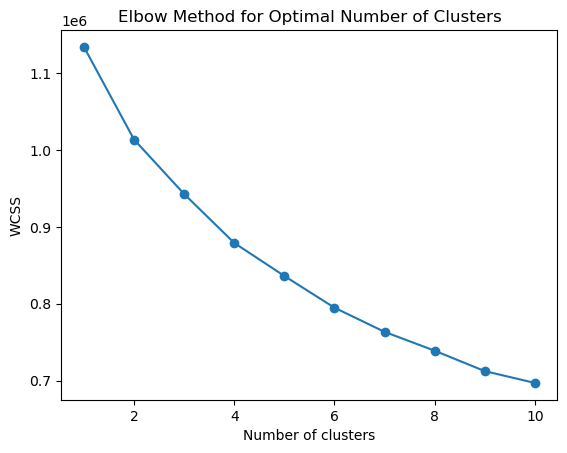

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of cluster values to try
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_train_scaled)  # X_train_scaled is your scaled feature data
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [44]:
# Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train_scaled)

# Adding cluster labels as a new feature
X_train_with_clusters = pd.DataFrame(X_train_scaled)
X_test_with_clusters = pd.DataFrame(X_test_scaled)
X_train_with_clusters['cluster_label'] = kmeans.predict(X_train_scaled)
X_test_with_clusters['cluster_label'] = kmeans.predict(X_test_scaled)

In [48]:
# Check sizes
print("X_train_with_clusters:", X_train_with_clusters.shape)
print("y_train_resampled:", y_train_resampled.shape)
print("X_test_with_clusters:", X_test_with_clusters.shape)
print("y_test:", y_test.shape)

X_train_with_clusters: (66700, 18)
y_train_resampled: (66700,)
X_test_with_clusters: (12165, 18)
y_test: (12165,)


# Modelling

In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, classification_report,
                             recall_score, f1_score, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

### Base Model: Logistic Regression

We'll begin by fitting a regular logistic regressor, so that we have something to compare our ensemble and more advanced methods to.

In [50]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_with_clusters, y_train_resampled)

# Evaluation for Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test_with_clusters)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Print Logistic Regression Results
print(f"Logistic Regression Accuracy: {acc_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1 Score: {f1_log_reg}, Confusion Matrix: {cm_log_reg}")

Logistic Regression Accuracy: 0.7286477599671188, Precision: 0.1736438679245283, Recall: 0.5418583256669733, F1 Score: 0.2630051350747935, Confusion Matrix: [[8275 2803]
 [ 498  589]]


**Interpretation:**

**F1 Score: 0.26 (or 26%)** - Given the low precision, the F1 score is also low, reflecting that the model struggles with false positives even if it catches some true positives.

The base model is somewhat effective as shown by the high accuracy (73%) which reflects its ability to handle the majority class well, but it struggles with classifying the minority class correctly as seen in the low precision and F1 score.

**Confusion Matrix**

True Negatives (8275): The model correctly predicted negative cases.

False Positives (2803): The model incorrectly predicted negative cases as positive.

False Negatives (498): The model incorrectly predicted positive cases as negative.

True Positives (589): The model correctly identified positive cases.

### Decision Tree Classification Model

In [55]:
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train_with_clusters, y_train_resampled)
y_pred_dt = dt_model.predict(X_test_with_clusters)

# Evaluation for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print Decision Tree Results
print(f"Decision Tree Accuracy: {acc_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}, Confusion Matrix: {cm_dt}")

Decision Tree Accuracy: 0.8761200164406083, Precision: 0.3506401137980085, Recall: 0.45354185832566696, F1 Score: 0.3955074207781789, Confusion Matrix: [[10165   913]
 [  594   493]]


### Random Forest Regression Model

In [54]:
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train_with_clusters, y_train_resampled)

# Evaluation for Random Forest
y_pred_rf = rf_model.predict(X_test_with_clusters)
cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print Random Forest Results
print(f"Random Forest Accuracy: {acc_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, Confusion Matrix: {cm_rf}")

Random Forest Accuracy: 0.9228113440197288, Precision: 0.6412213740458015, Recall: 0.3091076356945722, F1 Score: 0.41713221601489753, Confusion Matrix: [[10890   188]
 [  751   336]]


### XGB Regressor Model

In [57]:
! pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/fe/df/e3a1f3f008db8d2b199ded2168014c7784b8027714b74d802c892815fd72/xgboost-2.1.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.0/124.9 MB 326.8 kB/s eta 0:06:23
   ---------------------------------------- 0.1/124.9 MB 656.4 kB/s eta 0:03:11
   ---------------------------------------- 0.2/124.9 MB 807.1 kB/s eta 0:02:35
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:58
   ---------------------------------------- 0.5/124.9 MB 1.5 MB/s eta 0:01:25
   ---------------------------------------- 0.6/124.9 MB 1.7 MB/s eta 0:01:16
   ---------------------------------------- 1.0/124.9 MB 2.6 MB/s eta 0:00:49
   ------------------

XGBoost Classifier Accuracy: 0.9344019728729963, Precision: 0.7967145790554415, Recall: 0.35694572217111314, F1 Score: 0.49301143583227447, Confusion Matrix: [[10979    99]
 [  699   388]]


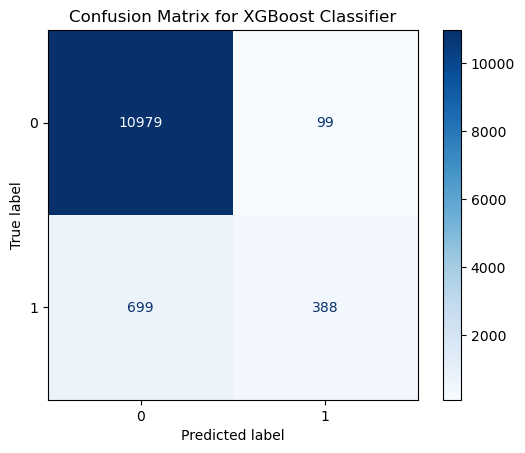

In [58]:
import xgboost as xgb
from xgboost import XGBClassifier

# Train the XGBoost Classifier
xgb_class = XGBClassifier()
xgb_class.fit(X_train_with_clusters, y_train_resampled)

# Evaluation for XGBoost Classifier
y_pred_xgb = xgb_class.predict(X_test_with_clusters)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print XGBoost Classifier Results
print(f"XGBoost Classifier Accuracy: {acc_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}, Confusion Matrix: {cm_xgb}")
ConfusionMatrixDisplay(cm_xgb).plot(cmap='Blues')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()